## Logistic Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

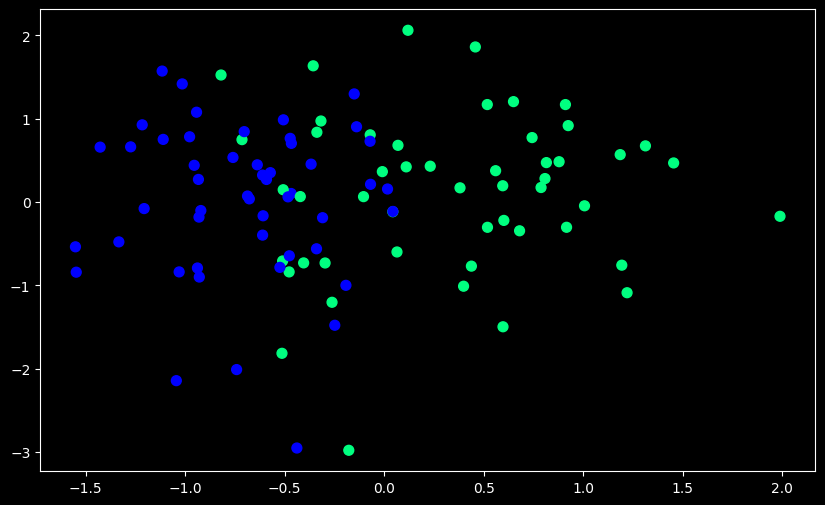

In [10]:
# Create a dataset for the example
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=5)

plt.style.use("dark_background")

plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=50)

In [17]:
def step(z):
    return 1 if z > 0 else 0

def perceptron(X, y):
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0, y.shape[0])
        y_pred = step(np.dot(X[j], weights))
        weights = weights + lr * (y[j] - y_pred) * X[j]
        
    return weights[0], weights[1:]
    

In [18]:
intercept, weights = perceptron(X, y)

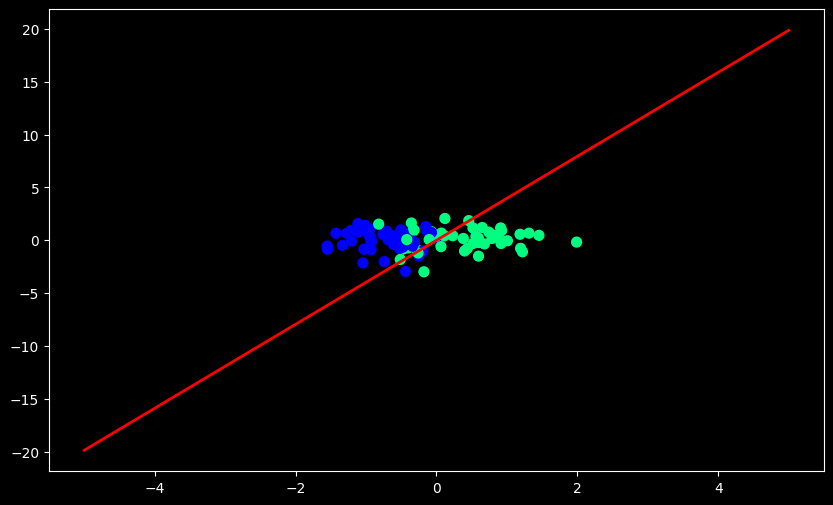

In [19]:
m = -weights[0] / weights[1]
b = -intercept / weights[1]

x_input = np.linspace(-5, 5, 100)
y_input = m * x_input + b

plt.style.use("dark_background")

plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=50)
plt.plot(x_input, y_input, color='red', linewidth=2)
plt.show()

In [39]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Create the DataFrame from the provided data
data = {
    'product_id': [1, 2, 1, 1, 2, 3],
    'new_price': [20, 50, 30, 35, 65, 20],
    'change_date': ['2019-08-14', '2019-08-14', '2019-08-15', '2019-08-16', '2019-08-17', '2019-08-18']
}

df = pd.DataFrame(data)

# Display the DataFrame
df

,product_id,new_price,change_date
0,1,20,2019-08-14
1,2,50,2019-08-14
2,1,30,2019-08-15
3,1,35,2019-08-16
4,2,65,2019-08-17
5,3,20,2019-08-18


In [41]:
def check(df):
    # Remove inplace=True and use .copy() to avoid modifying the original
    new_df = df.drop_duplicates(subset=['product_id'], keep='first').copy()
    
    # Use apply on the DataFrame (axis=1) to access entire rows
    new_df['new_price'] = new_df.apply(
        lambda row: 10 if row['change_date'] >= '2019-08-16' else row['new_price'], 
        axis=1
    )
    return new_df

check(df)

,product_id,new_price,change_date
0,1,20,2019-08-14
1,2,50,2019-08-14
5,3,10,2019-08-18


In [44]:
df = df[df['change_date'] <= '2019-08-16']
req_df = pd.merge(df, check(df), on=['product_id', 'change_date'], how='left')
req_df

,product_id,new_price_x,change_date,new_price_y
0,1,20,2019-08-14,20.0
1,2,50,2019-08-14,50.0
2,1,30,2019-08-15,NaN
3,1,35,2019-08-16,NaN


In [32]:
df = df[df['change_date'] <= '2019-08-16']
df.sort_values(by=['change_date'], inplace=True)
df

,product_id,new_price,change_date
0,1,20,2019-08-14
1,2,50,2019-08-14
2,1,30,2019-08-15
3,1,35,2019-08-16


In [33]:
df.drop_duplicates(subset=['product_id'], keep='last', inplace=True)
df

,product_id,new_price,change_date
1,2,50,2019-08-14
3,1,35,2019-08-16
